<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/%EF%BC%B3print6_%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#アルゴリズムの整理
#1.再帰関数を定義
#2.再帰で呼び出す最小のジニ係数時の特徴量と閾値と最小のジニ係数を実装
#3.ジニ係数の計算をするメソッドの実装


In [ ]:

#現在の最大表示行数の出力
pd.set_option('display.max_rows', 150)


In [ ]:
iris=load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
print(iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6     

In [ ]:
#targetの生成
all_y=pd.DataFrame(iris.target)
all_y.columns=['Species']

#特徴量との結合
all_xy=pd.merge(iris_data,all_y,left_index=True, right_index=True)


#sepal_lengthとpetal_lengthのみのデータの生成
part_all1=part_columns.drop('sepal width (cm)', axis=1)
part_all=part_all1.drop('petal width (cm)', axis=1)

In [ ]:
#numpyに変換
x=part_all.drop('Species', axis=1).values
y=part_all.iloc[:,-1].values

#分割 4特徴量
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [ ]:
class NodeConstruction():
  def __init__(self,X,y,max_depth=2):
    self.X=X
    self.y=y
    self.max_depth=max_depth
    self.feature=None
    self.threshold=None
    self.gini=None
    self.label=np.argmax(np.bincount(y))
    self.depth=None
    self.left=None
    self.right=None

  def _best(self, X,y):
    best_feature=None
    best_threshold=None
    best_gini=None
    #ジニ係数を計算し取得

    #ジニ係数の計算

    profit_max=0.0 #ジニ最小値の初期値設定 

    #ジニ係数を取得しながら、それが最小となる親ノードの特徴量と閾値を探す、その時の閾値と特徴量とジニ係数を返す
    
    for i in range(self.X.shape[1]):
      for j in self.X[:,i]:
        profit,best_gini=self._ginicul(self.X,self.y,i,j)

        if profit_max<profit:
          profit_max=profit
          best_threshold=j
          best_feature=i
          #print(profit)
    return (best_feature,best_threshold,best_gini)

  def _ginicul(self, X,y,i,j):
    feature=i
    threshold=j
    div_target=[self.y[self.X[:,feature]>=threshold],self.y[self.X[:,feature]<threshold]]    
    gini = 0
    sample_num = len(self.y) 

    #情報利得の計算
    #親ノード
    gini1=0
    score1 = 0
    parents_class=np.unique(self.y)
    for cls_p in parents_class:
      p1=np.sum(self.y==cls_p)/len(self.y)
      score1 +=p1*p1
      gini1=(1-score1)

    #子ノード
    for group in div_target:
      score = 0
      classes = np.unique(group)
      for cls in classes:
        p = np.sum(group == cls)/len(group)
        score += p * p
      gini += (1- score) * (len(group)/sample_num)
    profit=gini1-gini
    #print(profit)
    return profit,gini1
    
  def split(self,depth):
    self.depth=depth
    self.feature,self.threshold,self.gini=self._best(self.X,self.y) #特徴量、閾値、ジニ係数を取得
    print('Depth: {}, Sep at Feature: {},Threshold: {},Gini: {}, Label: {}'.format(self.depth, self.feature, self.threshold, self.gini,self.label))
    if self.max_depth==self.depth or self.gini==0: 
      return 
    x_left,x_right=[self.X[self.X[:,self.feature]>=self.threshold],self.X[self.X[:,self.feature]<self.threshold]] #indexで分岐
    y_left,y_right=[self.y[self.X[:,self.feature]>=self.threshold],self.y[self.X[:,self.feature]<self.threshold]] #indexで分岐

    #ノードを再帰関数で生成
    self.left=NodeConstruction(x_left,y_left,self.max_depth)
    self.right=NodeConstruction(x_right,y_right,self.max_depth)
    
    #ノードの深さを更新
    self.left.split(self.depth+1)
    self.right.split(self.depth+1)

  def predict(self,data):
    if self.gini== 0.0 or self.depth == self.max_depth:
      return self.label
    else:
        if data[self.feature] > self.threshold:
          return self.left.predict(data)
        else:
            return self.right.predict(data)

class ScratchDecesionTreeClassifierDepth1():
  def __init__(self, verbose=False, max_depth=4):
    # ハイパーパラメータを属性として記録
    self.verbose = verbose
    self.left = None
    self.right = None
    self.max_depth = max_depth
    self.depth = None
    self.threshold = None
    self.feature = None
    self.gini_min = None
    self.label = None

  def fit(self, X, y):
    initinal_depth=0
    self.tree = NodeConstruction(X, y, self.max_depth)
    self.tree.split(initinal_depth)

    if self.verbose:
      #verboseをTrueにした際は学習過程を出力
      print()
      pass
  def predict(self, X):
    y_pred=[]
    for i in X:
      y_pred.append(self.tree.predict(i))
    return np.array(y_pred)



In [ ]:
tr=ScratchDecesionTreeClassifierDepth1(max_depth=4)
tr.fit(x_train,y_train)

Depth: 0, Sep at Feature: 1,Threshold: 4.8,Gini: 0.499911111111111, Label: 2
Depth: 1, Sep at Feature: 1,Threshold: 5.1,Gini: 0.09730440499671267, Label: 2
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2
Depth: 2, Sep at Feature: 0,Threshold: 6.7,Gini: 0.375, Label: 2
Depth: 3, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 1
Depth: 3, Sep at Feature: 0,Threshold: 6.0,Gini: 0.24489795918367352, Label: 2
Depth: 4, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2
Depth: 4, Sep at Feature: 0,Threshold: 5.9,Gini: 0.5, Label: 1
Depth: 1, Sep at Feature: 0,Threshold: 5.0,Gini: 0.054012345679012475, Label: 1
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 1
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2


In [ ]:
y_pred1=tr.predict(x_test)
y_pred1

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1])

In [ ]:
#Sk-learn
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_train,y_train)
y_pred2=clf.predict(x_test)

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
#スクラッチ
print(accuracy_score(y_test, y_pred1))
#SC-learn
print(accuracy_score(y_test, y_pred2))

0.8
0.8


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



(159100, 2)


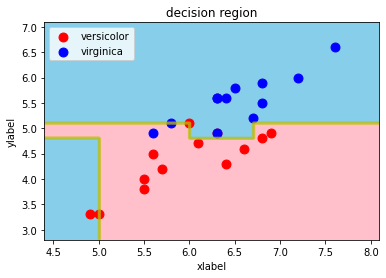

In [ ]:
decision_region(x_test,y_test, model=tr)

In [ ]:
#アディショナル

In [ ]:
#深さ6

In [ ]:
tr=ScratchDecesionTreeClassifierDepth1(max_depth=6)
tr.fit(x_train,y_train)
y_pred3=tr.predict(x_test)
y_pred3

Depth: 0, Sep at Feature: 1,Threshold: 4.8,Gini: 0.499911111111111, Label: 2
Depth: 1, Sep at Feature: 1,Threshold: 5.1,Gini: 0.09730440499671267, Label: 2
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2
Depth: 2, Sep at Feature: 0,Threshold: 6.7,Gini: 0.375, Label: 2
Depth: 3, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 1
Depth: 3, Sep at Feature: 0,Threshold: 6.0,Gini: 0.24489795918367352, Label: 2
Depth: 4, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2
Depth: 4, Sep at Feature: 0,Threshold: 5.9,Gini: 0.5, Label: 1
Depth: 5, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 1
Depth: 5, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2
Depth: 1, Sep at Feature: 0,Threshold: 5.0,Gini: 0.054012345679012475, Label: 1
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 1
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2


array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1])

In [ ]:
#深さ2

In [ ]:
tr=ScratchDecesionTreeClassifierDepth1(max_depth=2)
tr.fit(x_train,y_train)
y_pred3=tr.predict(x_test)
y_pred3

Depth: 0, Sep at Feature: 1,Threshold: 4.8,Gini: 0.499911111111111, Label: 2
Depth: 1, Sep at Feature: 1,Threshold: 5.1,Gini: 0.09730440499671267, Label: 2
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2
Depth: 2, Sep at Feature: 0,Threshold: 6.7,Gini: 0.375, Label: 2
Depth: 1, Sep at Feature: 0,Threshold: 5.0,Gini: 0.054012345679012475, Label: 1
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 1
Depth: 2, Sep at Feature: None,Threshold: None,Gini: 0.0, Label: 2


array([1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 1])